In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import stats

In [47]:
#date 
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
#chose the attrition to get analysis and abuse to t-test
att = df[df['Attrition']=="Yes"]

In [6]:
att

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [7]:
att.set_index('DistanceFromHome')

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
DistanceFromHome,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
24,28,Yes,Travel_Rarely,103,Research & Development,3,Life Sciences,1,19,3,...,2,80,0,6,4,3,4,2,0,3
9,36,Yes,Travel_Rarely,1218,Sales,4,Life Sciences,1,27,3,...,2,80,0,10,4,3,5,3,0,3
6,34,Yes,Travel_Rarely,699,Research & Development,1,Medical,1,31,2,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,23,Yes,Travel_Frequently,638,Sales,3,Marketing,1,2023,4,...,1,80,1,1,3,2,1,0,1,0
1,29,Yes,Travel_Rarely,1092,Research & Development,4,Medical,1,2027,1,...,2,80,3,4,3,4,2,2,2,2
7,56,Yes,Travel_Rarely,310,Research & Development,2,Technical Degree,1,2032,4,...,4,80,1,14,4,1,10,9,9,8


In [8]:
att.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x1440 with 0 Axes>

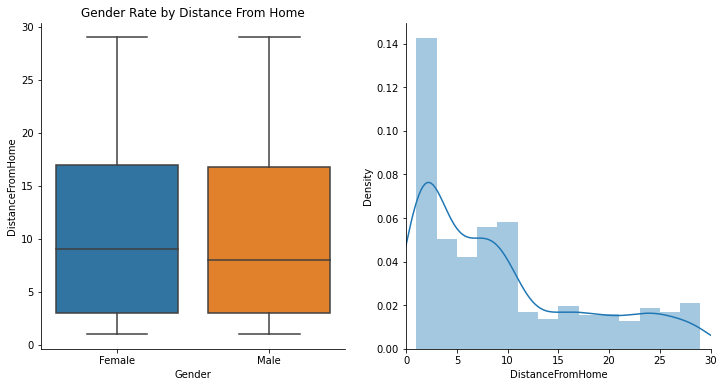

In [10]:
plt.figure(figsize=([10,20]))
plt.subplots(12,figsize=[12,6])
plt.subplot(121)
sns.boxplot(x='Gender',y='DistanceFromHome',data=att)
plt.title("Gender Rate by Distance From Home")
plt.subplot(122)
sns.distplot(df['DistanceFromHome'])
plt.xlim(0,30)
sns.despine()

In [11]:
cont_col = []
for column in att.columns:
    if att[column].dtypes != object and att[column].nunique() > 30:
        print(f"{column} : Minimum: {att[column].min()}, Maximum: {att[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 58
DailyRate : Minimum: 103, Maximum: 1496
EmployeeNumber : Minimum: 1, Maximum: 2055
HourlyRate : Minimum: 31, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19859
MonthlyRate : Minimum: 2326, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


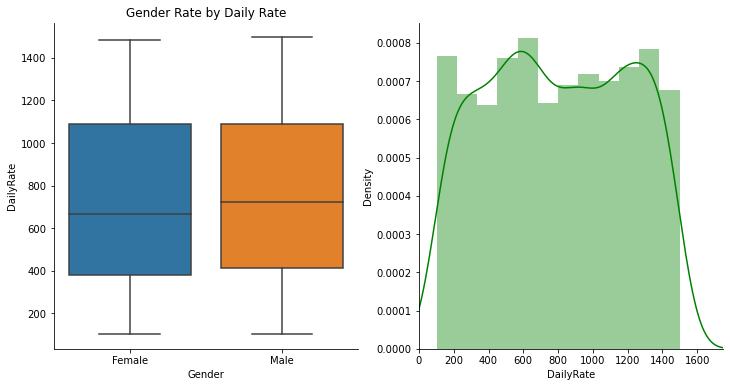

In [12]:
plt.subplots(12,figsize=[12,6])
plt.subplot(121)
sns.boxplot(x='Gender',y='DailyRate',data=att)
plt.title("Gender Rate by Daily Rate")
plt.subplot(122)
sns.distplot(df['DailyRate'],color='green')
plt.xlim(0,1750)
sns.despine()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


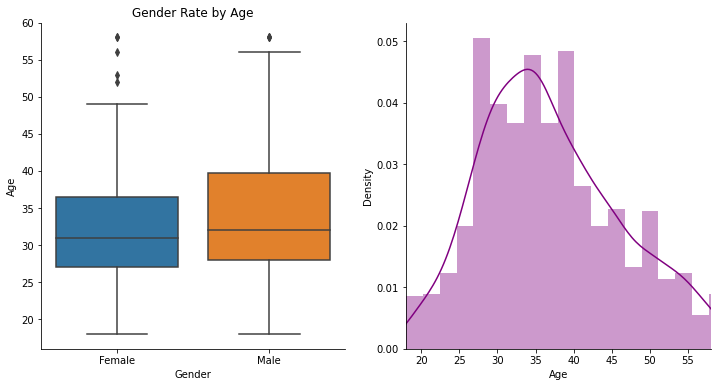

In [13]:
plt.subplots(12,figsize=[12,6])
plt.subplot(121)
sns.boxplot(x='Gender',y='Age',data=att)
plt.title("Gender Rate by Age")
plt.subplot(122)
sns.distplot(df['Age'],color='purple')
plt.xlim(18,58)
sns.despine()

<AxesSubplot:>

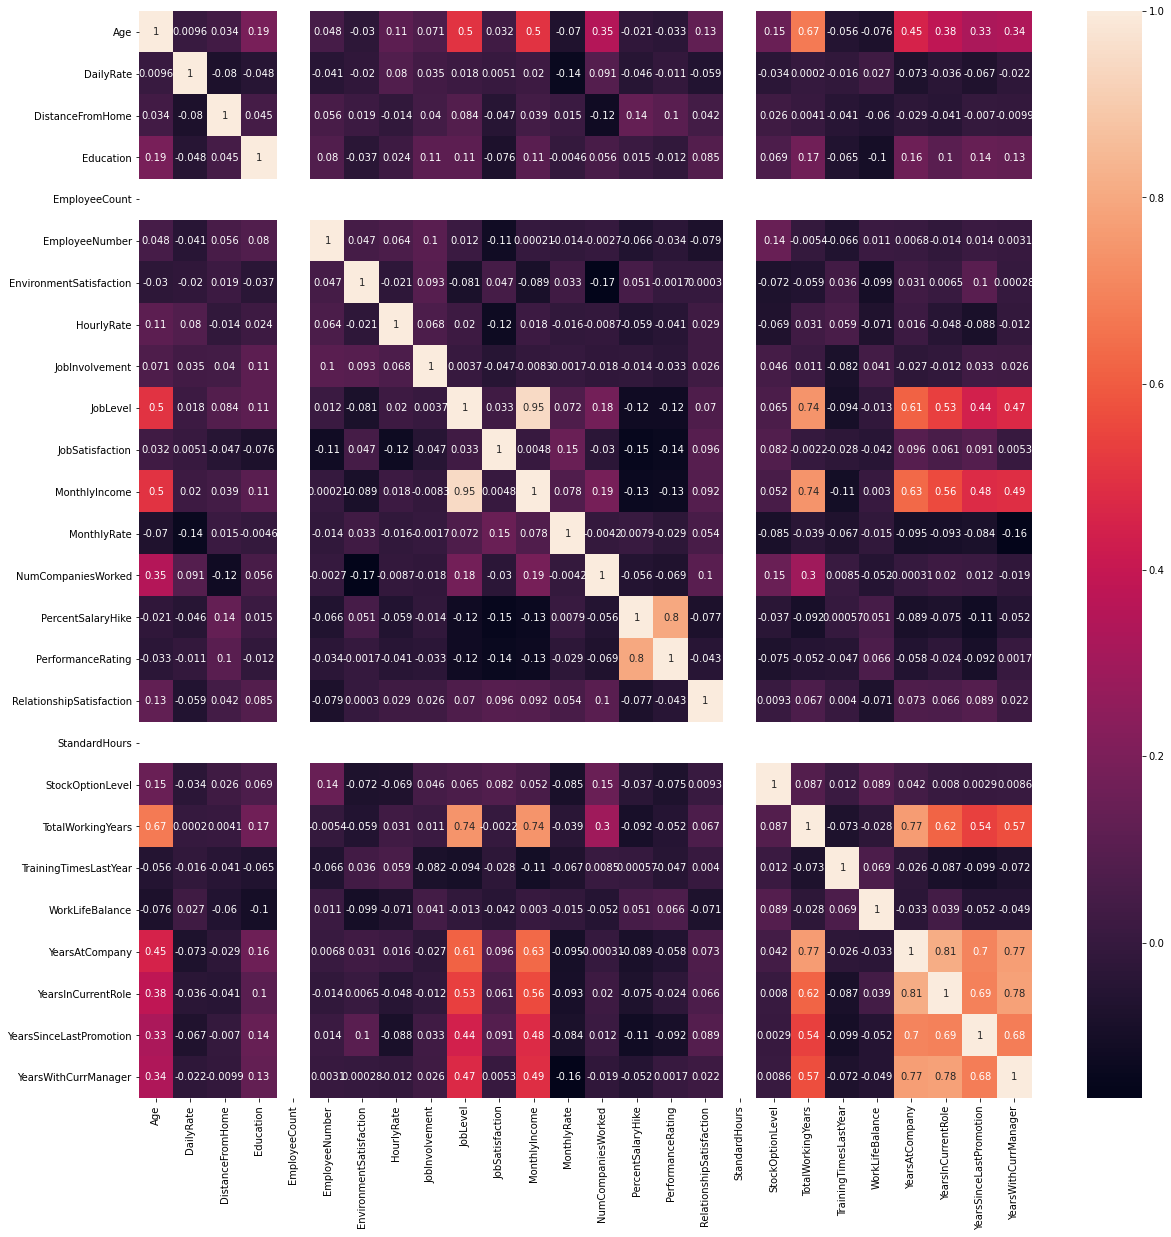

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(att.corr(),annot=True)

In [15]:
#data list attrition of male and female 
Male = att[att['Gender']=='Male']
FM = att[att['Gender']=='Female']

In [16]:
#data attrition of Gender rate by distance from home
A1 = Male["DistanceFromHome"]
A2 = FM['DistanceFromHome']
def lstm():
    lst =[]
    for x in A1:
        lst.append(x)
    return lst

In [17]:
def lstfm():
    lst1 =[]
    for x in A2:
        lst1.append(x)
    return lst1

In [18]:
MDFH=np.array(lstm())

In [19]:
FMDFH=np.array(lstfm())

In [20]:
stats.ttest_ind(MDFH,FMDFH)

Ttest_indResult(statistic=-0.39686700445254536, pvalue=0.6918257124400549)

In [21]:
Male["DailyRate"]

2       1373
14       103
21      1218
24       699
33       895
        ... 
1438     638
1442    1092
1444     310
1452     878
1461     410
Name: DailyRate, Length: 150, dtype: int64

In [22]:
#data attrition of Gender rate by Daily Rate
B1 = Male["DailyRate"]
B2 = FM['DailyRate']
def lstm1():
    lstB1 =[]
    for x in B1:
        lstB1.append(x)
    return lstB1

In [23]:
def lstfm1():
    lstB2 =[]
    for x in B2:
        lstB2.append(x)
    return lstB2

In [24]:
MDR=np.array(lstm1())
FMDR=np.array(lstfm1())

In [25]:
stats.ttest_ind(MDR,FMDR)

Ttest_indResult(statistic=0.5499617013631484, pvalue=0.5828679540221176)

In [26]:
#data attrition of Gender rate by Age
C1 = Male["Age"]
C2 = FM['Age']
def lstm2():
    lstC1 =[]
    for x in C1:
        lstC1.append(x)
    return lstC1

In [27]:
def lstfm2():
    lstC2 =[]
    for x in C2:
        lstC2.append(x)
    return lstC2

In [28]:
MAge=np.array(lstm2())
FMAge=np.array(lstfm2())

In [29]:
stats.ttest_ind(MAge,FMAge)

Ttest_indResult(statistic=1.2513082727386977, pvalue=0.21206624658075152)

In [52]:
att1 = df[df['Attrition']=="No"]

In [53]:
att1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [54]:
att1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,...,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [55]:
att1.set_index('DistanceFromHome')

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
DistanceFromHome,,,,,,,,,,,,,,,,,,,,,
8,49,No,Travel_Frequently,279,Research & Development,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
2,27,No,Travel_Rarely,591,Research & Development,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
2,32,No,Travel_Frequently,1005,Research & Development,2,Life Sciences,1,8,4,...,3,80,0,8,2,2,7,7,3,6
3,59,No,Travel_Rarely,1324,Research & Development,3,Medical,1,10,3,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,36,No,Travel_Frequently,884,Research & Development,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
6,39,No,Travel_Rarely,613,Research & Development,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
4,27,No,Travel_Rarely,155,Research & Development,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x1440 with 0 Axes>

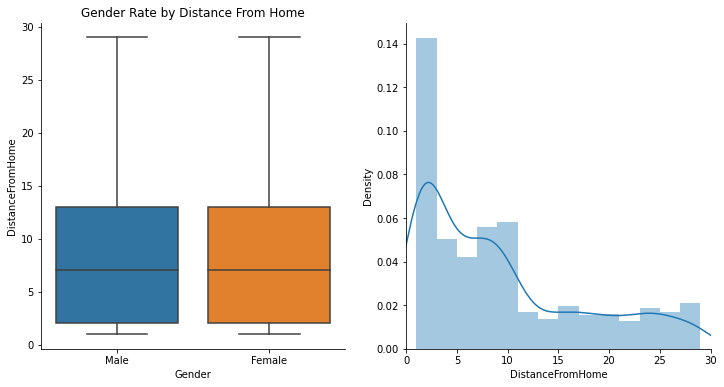

In [56]:
plt.figure(figsize=([10,20]))
plt.subplots(12,figsize=[12,6])
plt.subplot(121)
sns.boxplot(x='Gender',y='DistanceFromHome',data=att1)
plt.title("Gender Rate by Distance From Home")
plt.subplot(122)
sns.distplot(df['DistanceFromHome'])
plt.xlim(0,30)
sns.despine()

In [57]:
cont_col = []
for column in att1.columns:
    if att1[column].dtypes != object and att1[column].nunique() > 30:
        print(f"{column} : Minimum: {att1[column].min()}, Maximum: {att1[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
EmployeeNumber : Minimum: 2, Maximum: 2068
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1051, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26997
TotalWorkingYears : Minimum: 0, Maximum: 38
YearsAtCompany : Minimum: 0, Maximum: 37


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


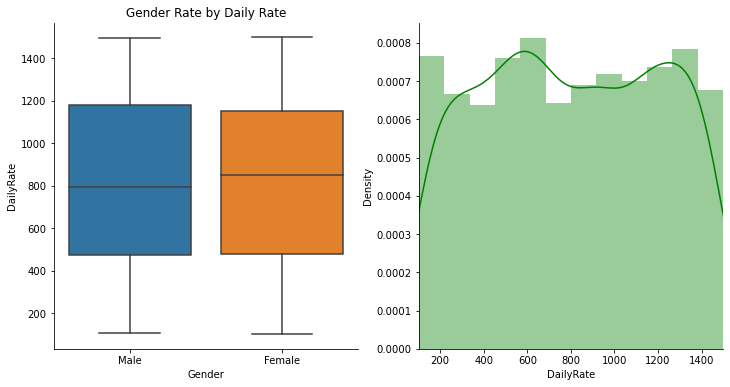

In [58]:
plt.subplots(12,figsize=[12,6])
plt.subplot(121)
sns.boxplot(x='Gender',y='DailyRate',data=att1)
plt.title("Gender Rate by Daily Rate")
plt.subplot(122)
sns.distplot(df['DailyRate'],color='green')
plt.xlim(102,1500)
sns.despine()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


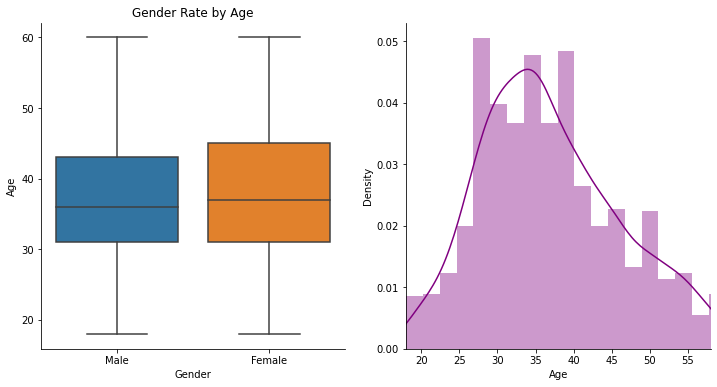

In [59]:
plt.subplots(12,figsize=[12,6])
plt.subplot(121)
sns.boxplot(x='Gender',y='Age',data=att1)
plt.title("Gender Rate by Age")
plt.subplot(122)
sns.distplot(df['Age'],color='purple')
plt.xlim(18,58)
sns.despine()

<AxesSubplot:>

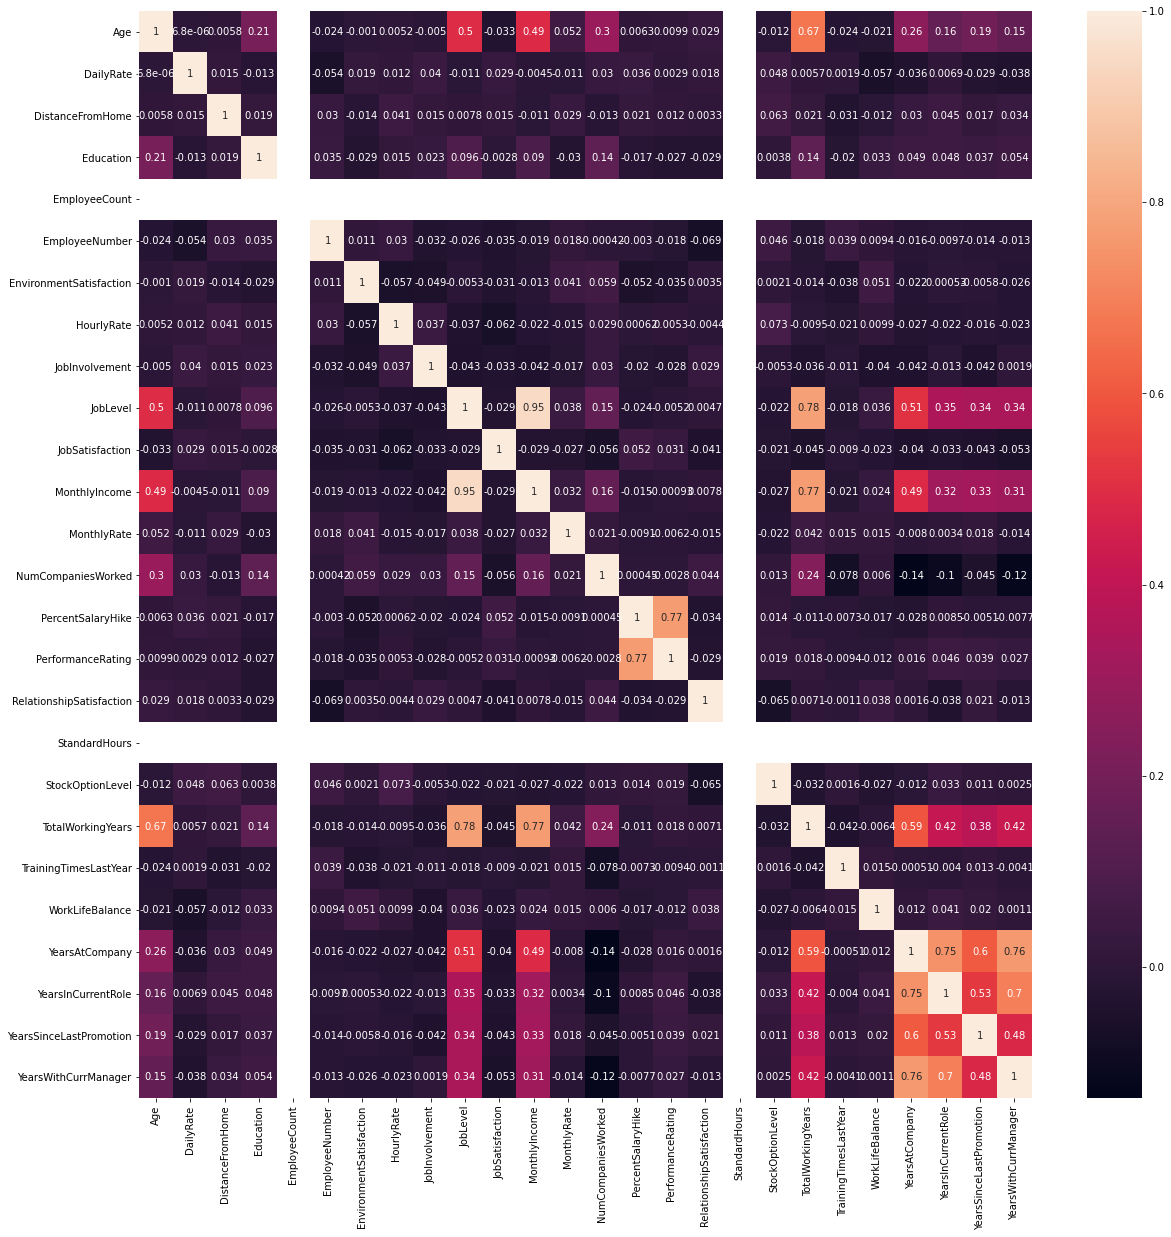

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(att1.corr(),annot=True)

In [61]:
#data list satisfaction of male and female 
Male1 = att1[att1['Gender']=='Male']
FM1 = att1[att1['Gender']=='Female']

In [62]:
#data satisfaction of Gender rate by distance from home
X1 = Male1["DistanceFromHome"]
X2 = FM1['DistanceFromHome']
def lstmx():
    lst =[]
    for x in X1:
        lst.append(x)
    return lst

In [63]:
def lstfmx():
    lst1 =[]
    for x in X2:
        lst1.append(x)
    return lst1

In [64]:
X1DFH=np.array(lstmx())
X2DFH=np.array(lstfmx())

In [65]:
stats.ttest_ind(X1DFH,X2DFH)

Ttest_indResult(statistic=0.005368012917935863, pvalue=0.995717835696763)

In [66]:
#data attrition of Gender rate by Daily Rate
Y1 = Male1["DailyRate"]
Y2 = FM1['DailyRate']
def lstmy():
    lstB1 =[]
    for x in Y1:
        lstB1.append(x)
    return lstB1

In [67]:
def lstfmy():
    lstB2 =[]
    for x in Y2:
        lstB2.append(x)
    return lstB2

In [68]:
Y1DR=np.array(lstmy())
Y2DR=np.array(lstfmy())

In [69]:
stats.ttest_ind(Y1DR,Y2DR)

Ttest_indResult(statistic=-0.6557864384271774, pvalue=0.5120840862940226)

In [70]:
#data attrition of Gender rate by Age
Z1 = Male1["Age"]
Z2 = FM1['Age']
def lstmz():
    lstC1 =[]
    for x in Z1:
        lstC1.append(x)
    return lstC1

In [71]:
def lstfmz():
    lstC2 =[]
    for x in Z2:
        lstC2.append(x)
    return lstC2

In [72]:
Z1Age=np.array(lstmz())
Z2Age=np.array(lstfmz())

In [73]:
stats.ttest_ind(Z1Age,Z2Age)

Ttest_indResult(statistic=-1.9450592962806397, pvalue=0.05199528816776108)